In [1]:
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
from torchvision.utils import make_grid, save_image
from fastai.vision import *


from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
def load(tag, ids):
    img_dir = '/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Test1/valid/{}'.format(tag)
    
    img_name = '{}_{}.jpg'.format(tag,ids)
    img_path = os.path.join(img_dir, img_name)

    pil_img = PIL.Image.open(img_path)
    return pil_img

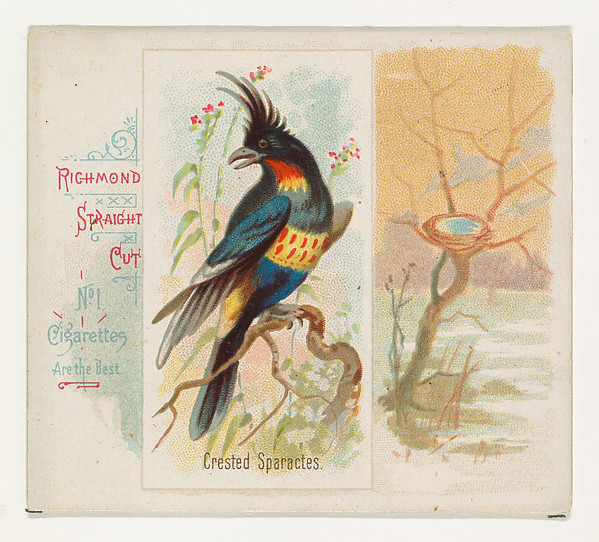

In [29]:
image1 = load('birds',421997)
image1

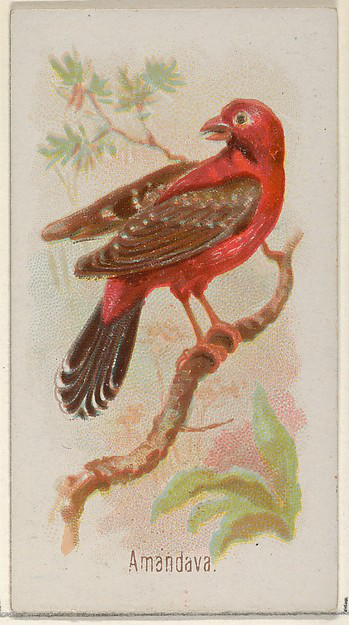

In [4]:
image1 = load('birds',409633)
image1

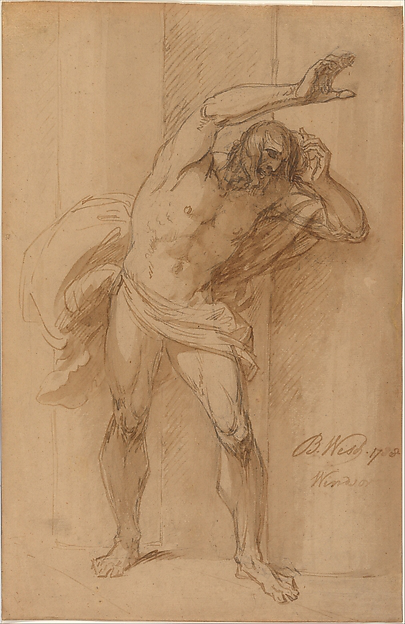

In [5]:
image2 = load('men',16874)
image2

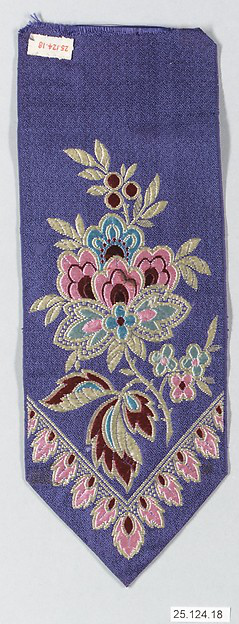

In [18]:
image3 = load('flowers',221673)
image3

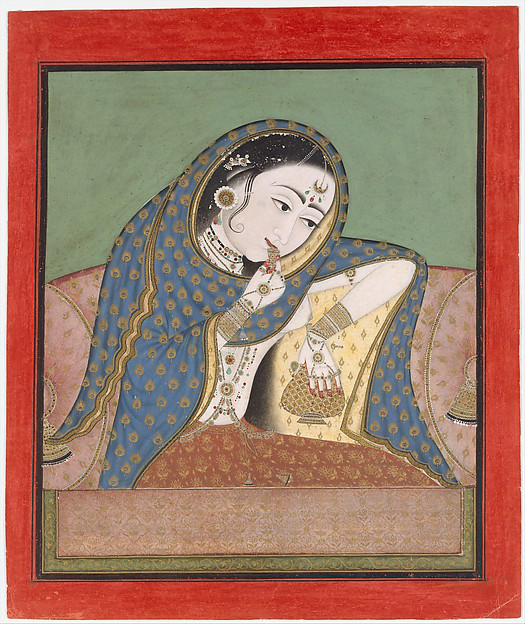

In [33]:
image3 = load('women',38012)
image3

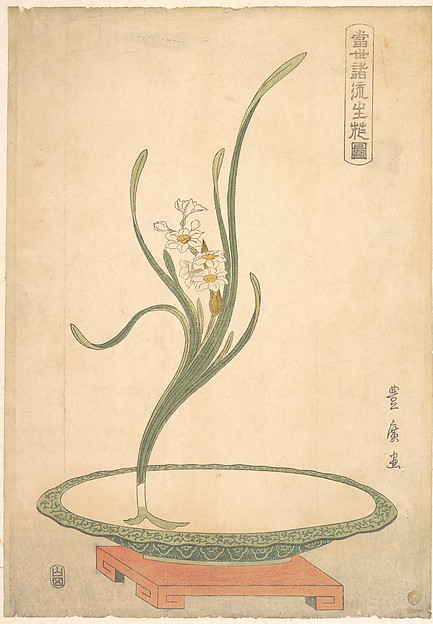

In [50]:
image4 = load('flowers',54884)
image4

In [30]:
# preprocess image
torch_img = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(image1).to(device)
normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(torch_img)[None]

In [12]:
resnet101 = models.resnet101(pretrained=True)
resnet50 = models.resnet50(pretrained=True)


In [24]:
configs = [
    dict(model_type='resnet', arch=resnet101, layer_name='layer4'),
    dict(model_type='resnet', arch=resnet50, layer_name='layer4')
]

In [25]:
for config in configs:
    config['arch'].to(device).eval()



In [26]:
cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [31]:
images = []
for gradcam, gradcam_pp in cams:
    mask, _ = gradcam(normed_torch_img)
    heatmap, result = visualize_cam(mask, torch_img)

    mask_pp, _ = gradcam_pp(normed_torch_img)
    heatmap_pp, result_pp = visualize_cam(mask_pp, torch_img)
    
    images.extend([torch_img.cpu(), result, result_pp])
    
grid_image = make_grid(images, nrow=3)

/home/yl2vq/.local/lib/python3.6/site-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


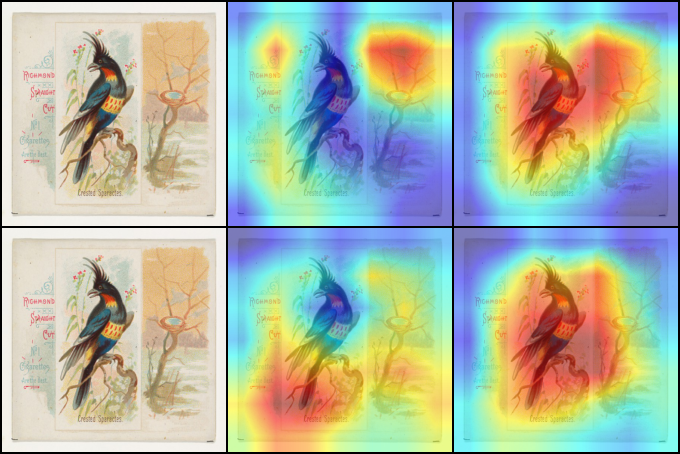

In [32]:
transforms.ToPILImage()(grid_image)

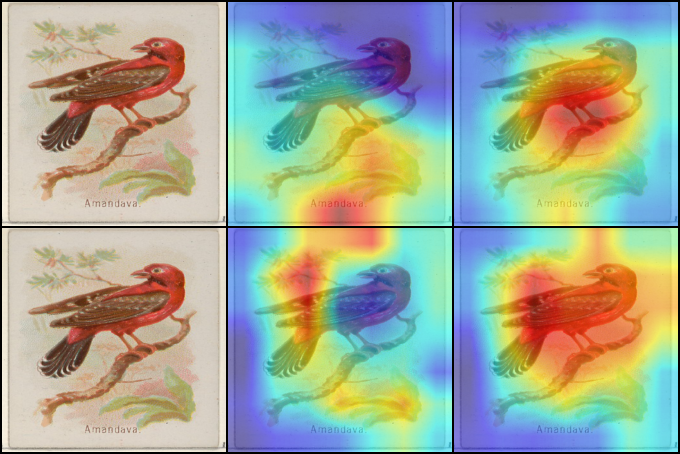

In [14]:
transforms.ToPILImage()(grid_image)

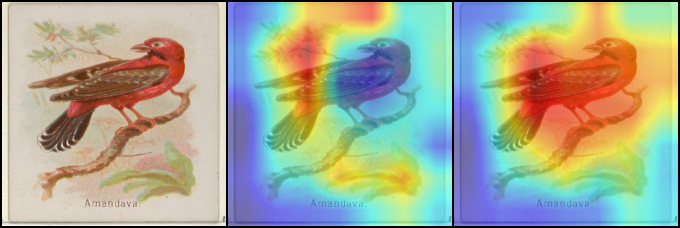

In [113]:
transforms.ToPILImage()(grid_image)

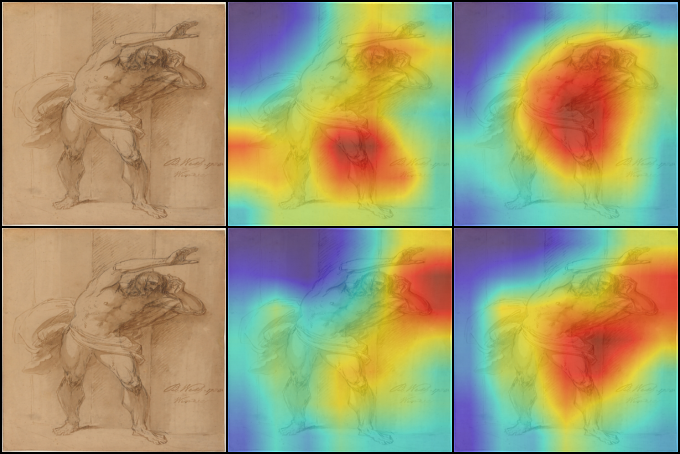

In [20]:
transforms.ToPILImage()(grid_image)

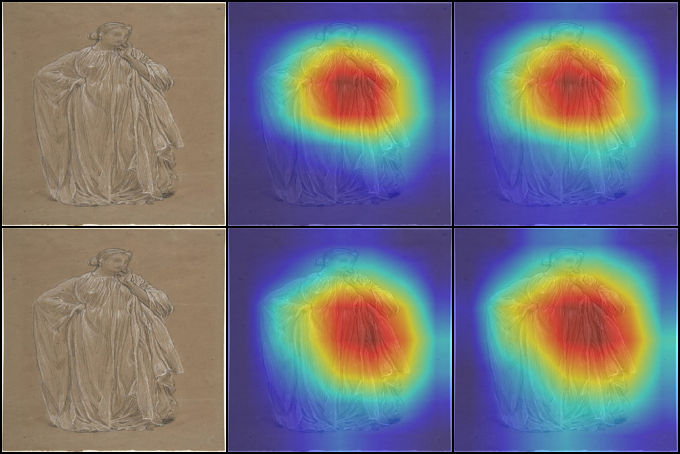

In [26]:
transforms.ToPILImage()(grid_image)

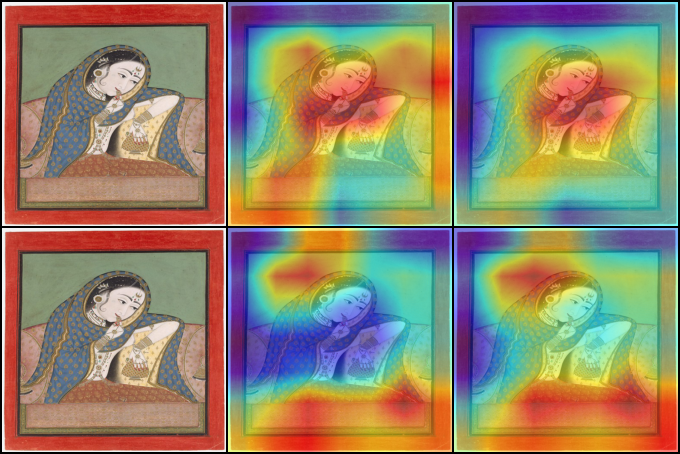

In [36]:
transforms.ToPILImage()(grid_image)

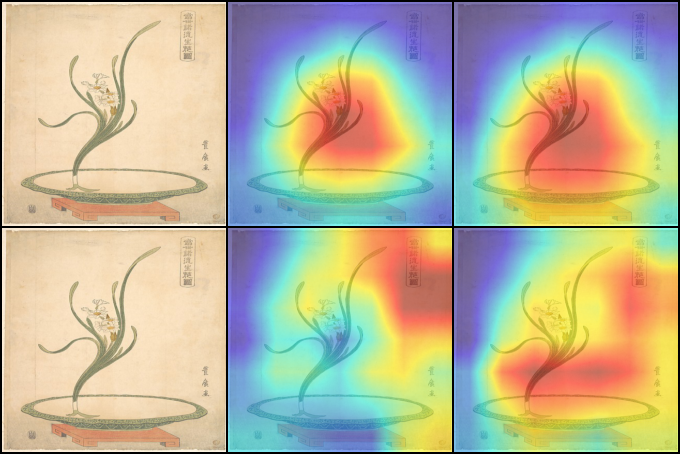

In [44]:
transforms.ToPILImage()(grid_image)

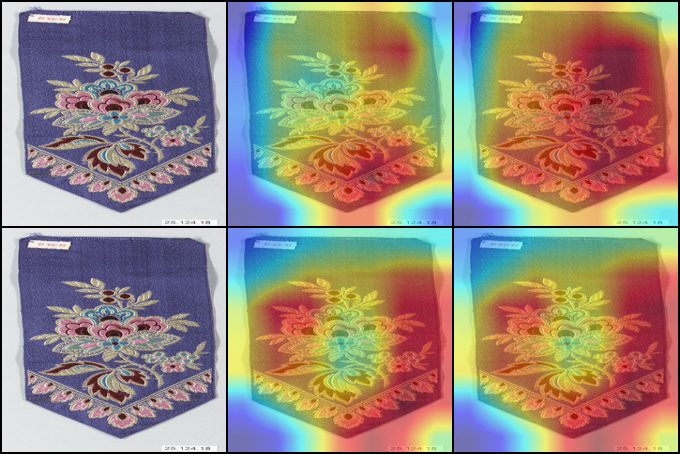

In [21]:
transforms.ToPILImage()(grid_image)